In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)


In [2]:
# merge the 2 csv files and then make a list of dataframes that contains the data of each firm.

df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
merged = [y for _, y in df.groupby('firm', as_index=False)]

In [3]:

# firm size measures: 

for i in range(len(merged)):  # iterate through each dataframe on the list and calculate the formulas.

    merged[i]['lprice'] = merged[i].groupby(['firm'])['adjprice'].shift(4)
    merged[i]['r'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i]['lprice'].astype(float))
    merged[i]['r2'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i].groupby(['firm'])['adjprice'].shift(4).astype(float))
    merged[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]

    merged[i]['book_value'] = (merged[i]['totalassets'] - merged[i]['totalliabilities']  )
    merged[i]['market_value'] = (merged[i]['adjprice'].max() * merged[i]['stockholderequity'] )
    x = (merged[i]['originalprice'] * merged[i]['sharesoutstanding'] )

    #profit margin measures
    merged[i]['operating_profit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'])
    merged[i]['ebit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'] - merged[i]['otheropexp'])
    merged[i]['operating_profit_margin'] =  ( merged[i]['ebit'] / merged[i]['revenue'] )


In [4]:

# We want to make the analisis of the rolling year, so we collapse the last 4 values of the firm.

for i in range(len(merged)): 
    df = merged[i].tail(4) # get the last 4 values of the firm.

    dummy = merged[i].tail(1) # get the last value of the firm so we can extract some values.
    
    # temporaly store some values to then added to the final dataframe.

    totalassets = list(dummy['totalassets'])[0]
    totalliabilities = list(dummy['totalliabilities'])[0]
    shortdebt = list(dummy['shortdebt'])[0]
    longdebt = list(dummy['longdebt'])[0]
    stockholderequity = list(dummy['stockholderequity'])[0]
    adjprice = list(dummy['adjprice'])[0]
    originalprice = list(dummy['originalprice'])[0]
    book_value = list(dummy['book_value'])[0]
    market_value = list(dummy['market_value'])[0]
    operating_profit = list(dummy['operating_profit'])[0]
    ebit = list(dummy['ebit'])[0]
    operating_profit_margin = list(dummy['operating_profit_margin'])[0]
    sharesoutstanding = list(dummy['sharesoutstanding'])[0]
    naics = list(dummy['Sector NAICS\nlevel 1'])[0]
    Name = list(dummy['Name'])[0]

    # collapse the last 4 values of the firm.
    newDf = df.groupby('firm', as_index=False).agg({'revenue':'sum', 'cogs':'sum', 'cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum', 'incometax': 'sum'}) 

    # add the stored values to the new dataframe of the firm.
    newDf['totalassets'] = totalassets
    newDf['totalliabilities'] = totalliabilities
    newDf['shortdebt'] = shortdebt
    newDf['longdebt'] = longdebt
    newDf['stockholderequity'] = stockholderequity
    newDf['adjprice'] = adjprice
    newDf['originalprice'] = originalprice
    newDf['sharesoutstanding'] = sharesoutstanding
    newDf['book_value'] = book_value
    newDf['market_value'] = market_value
    newDf['operating_profit'] = operating_profit
    newDf['operating_profit_margin'] = operating_profit_margin
    newDf['ebit'] = ebit
    newDf['Sector NAICS\nlevel 1'] = naics
    newDf['Name'] = Name

    merged[i] = newDf # replace the new firm df on the index of the list of all firms dataframes.
    

In [5]:
# because we have a list of dataframes, we want to make only 1 dataframe with n rows of the abstract of each firm.
# we get each row of each dataframe in the list and appended to a new df.
# finally we get only 1 dataframe of n rows wich n row is the abstract of each firm. 
collapsed_dataframes = pd.DataFrame()
for df in merged:
    collapsed_dataframes = collapsed_dataframes.append(df, ignore_index=True)
collapsed_dataframes # print the final dataframe to visualize better.

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,164000.0,1.045500e+07,5.333000e+06,...,118.560000,118.7700,298708.056,5122000.000,8.139299e+08,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,869000.0,1.570900e+07,8.417000e+06,...,45.487956,45.5800,184448.686,7292000.000,6.540498e+08,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,4333.0,1.084755e+06,8.710570e+05,...,3.250000,3.2500,35016.392,213698.000,2.172580e+07,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,-546000.0,6.796300e+07,7.638500e+07,...,12.680000,12.6800,649514.848,-8422000.000,-4.279606e+08,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,863.0,3.792740e+05,2.701730e+05,...,2.670000,2.6700,20398.497,109101.000,5.262433e+05,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,55.0,1.127380e+05,2.553900e+04,...,2.810000,2.8100,67209.461,87199.000,1.003660e+06,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3603,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,98.0,8.543300e+04,7.882800e+04,...,0.970100,0.9701,34095.968,6605.000,1.651250e+05,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3604,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,-13700.0,1.176300e+06,9.469000e+05,...,27.179735,27.2400,125967.533,229400.000,8.315018e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3605,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,44.0,4.709680e+05,2.343450e+05,...,1.230000,1.2300,103140.755,236623.000,9.467286e+06,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


What is the composition of US public firms in terms of size, sales performance and profitability?

- We can see from the graphs from below that for some of the firms the size is above 0.5 and for the rest there are below 0.2.

- For the sales we can see more activity with some of the firms above 2.5. For the rest of the firms they stay between 0 and 0.2

- For the profitability we can see that only a few ones go above 2.0 and the majority of the firms are in a range between 0 and 0.2.

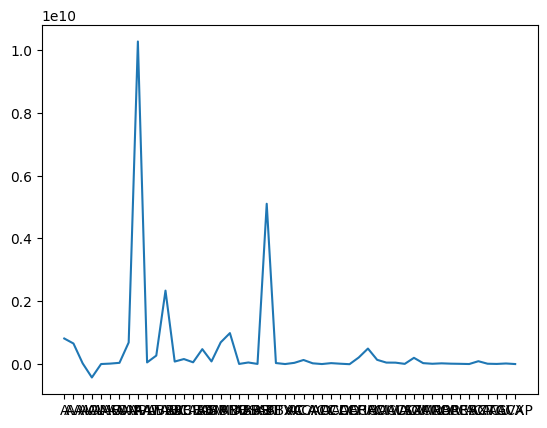

In [148]:
# getting the size of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['market_value'][0:50] )


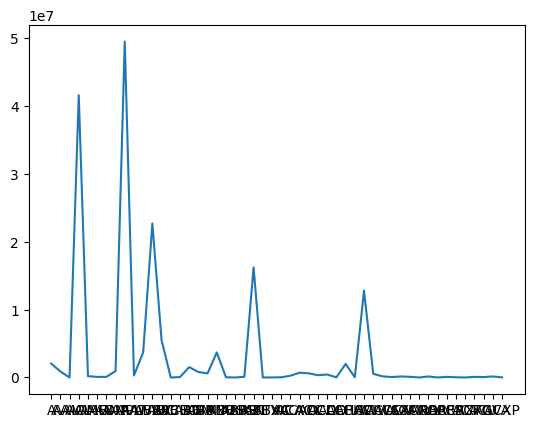

In [149]:
# getting the sales of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['sgae'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['sgae'][0:50] )

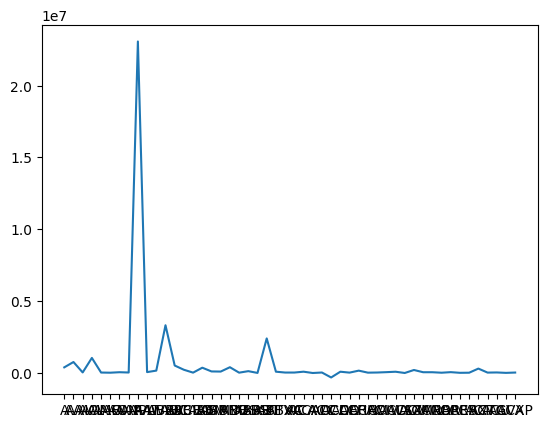

In [151]:
# getting the profitability of the firms 

df = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['ebit'].agg('sum')).reset_index()
df
plt.plot(df['firm'][0:50],df['ebit'][0:50] )

Why some firms are more profitable than others? Which factors/variables are related to profitability?

- The definition of profitability is the extent to which its total income exceeds its total expenses for any given period. 

- To calculate the profitability of a company we can take the next formula: Total Revenue - Total Expenses

- So the things that can affect the profitability of a company can be the number of production units, production per unit, direct and indirect costs, etc.

Show how many firms by industry there are in the sample 

 - We can see that the sector that has more firms is the Manufacturing sector with 1565 firms, and the one with the least is Educational services with 14 firms.

 - Also we can see an increment of firms pass by the information industry.
 - Below information industry all the industries stay below 200.

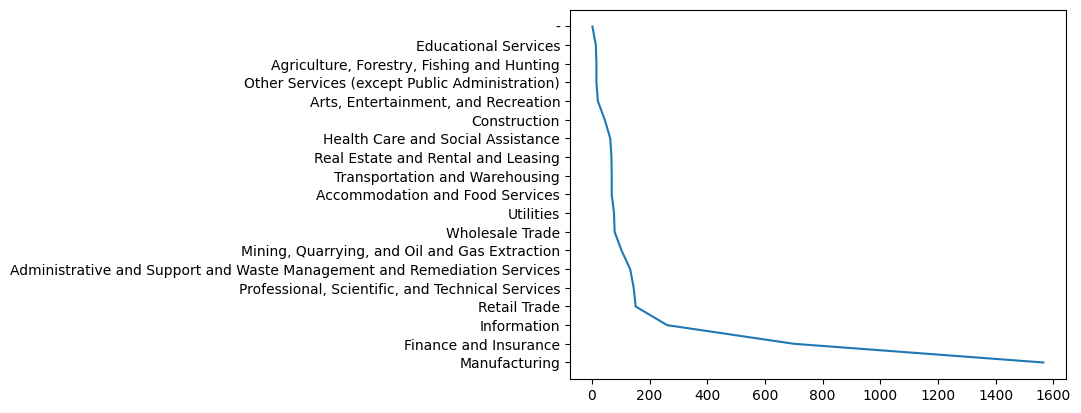

In [122]:
firms_by_industry = collapsed_dataframes.groupby('Sector NAICS\nlevel 1') # group all the firms by sector
firms_by_industry = pd.DataFrame(firms_by_industry['Sector NAICS\nlevel 1'].count().sort_values(ascending=False)) # count all the firms on each sector
firms_by_industry = firms_by_industry.rename(columns={"Sector NAICS\nlevel 1": "# firms"}) 
firms_by_industry = firms_by_industry.reset_index()
plt.plot(firms_by_industry['# firms'], firms_by_industry['Sector NAICS\nlevel 1'])


For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

- The first thing that i see is that the  market value and the book value of each of the indistries differ a lot in some industries, in someones the market value is the triple of the book value like Manufacturing, and in other is the double. 

- The other thing that we see based on the graph is that the market value and book value doesn't differ a lot in some of the industries, in fact we can see the 2 lines somehow converge and stay for almost all of the firms.

- Also we can see that some industries have a negative market value but a "stable" book value.

,Sector NAICS\nlevel 1,market_value,book_value
0,Manufacturing,9.918256e+11,3.635015e+09
1,"Professional, Scientific, and Technical Services",6.334235e+11,3.449484e+09
2,Finance and Insurance,6.248129e+11,1.036435e+09
3,Information,1.833772e+11,5.432704e+08
4,Administrative and Support and Waste Managemen...,7.600424e+10,5.028128e+08
5,Retail Trade,6.750233e+10,5.002175e+08
6,Utilities,4.511864e+10,3.496151e+08
7,Wholesale Trade,2.878474e+10,3.245564e+08
8,Construction,2.862252e+10,2.334237e+08
9,Real Estate and Rental and Leasing,2.465113e+10,1.180439e+08


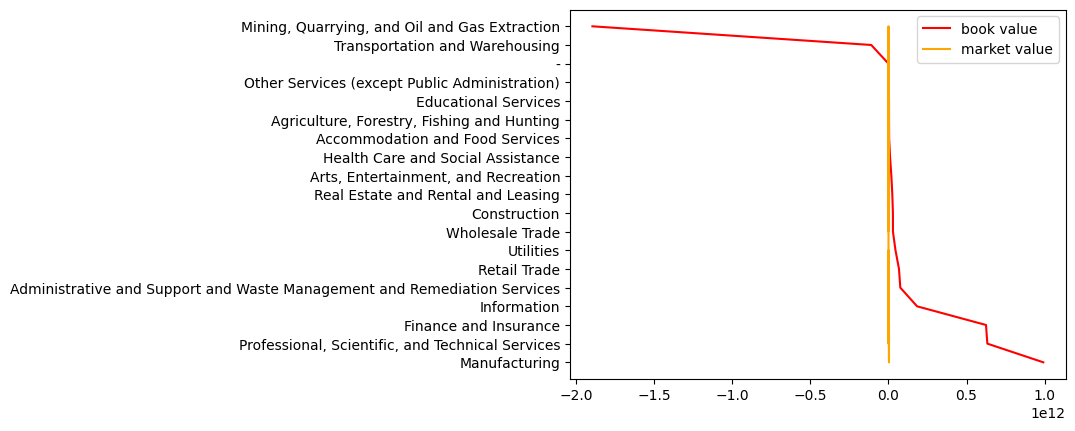

In [121]:


industries_market_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
industries_book_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['book_value'].agg('sum'))

industries_market_value = pd.DataFrame(industries_market_value['market_value'].sort_values(ascending=False))
industries_book_value = pd.DataFrame(industries_book_value['book_value'].sort_values(ascending=False))

industries_market_value = industries_market_value.reset_index()
industries_book_value = industries_book_value.reset_index()


x = industries_market_value['Sector NAICS\nlevel 1']
y = industries_market_value['market_value']

x2 = industries_book_value['Sector NAICS\nlevel 1']
y2 = industries_book_value['book_value']

plt.plot(y,x, color="red")
plt.plot(y2,x2,color ='orange')
plt.legend(['book value', 'market value'])
industries_market_value['book_value'] = industries_book_value['book_value'] # merge book value and market value on 1 dataframe
industries_market_value



For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

- We can see that there are only 2 industries that have a profit margin more than 1.0 which are "Accommodation and Food Services" and "Construction" with 6.9 and 4.6 respectively.

- Also we can see that there are a lot of industries with a profit margin between 0 and 1. 

- There is a industry with a profit margin of -13.578666. 

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\matplotlib\transforms.py:2012: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\matplotlib\transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


,Sector NAICS\nlevel 1,operating_profit_margin
0,Accommodation and Food Services,6.948798
1,Construction,4.681278
2,Wholesale Trade,0.968937
3,"Arts, Entertainment, and Recreation",0.731669
4,Transportation and Warehousing,0.688176
5,Other Services (except Public Administration),0.606959
6,-,0.463653
7,Educational Services,-0.023139
8,"Agriculture, Forestry, Fishing and Hunting",-0.250904
9,Retail Trade,-0.951040


C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\matplotlib\transforms.py:2012: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\matplotlib\transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


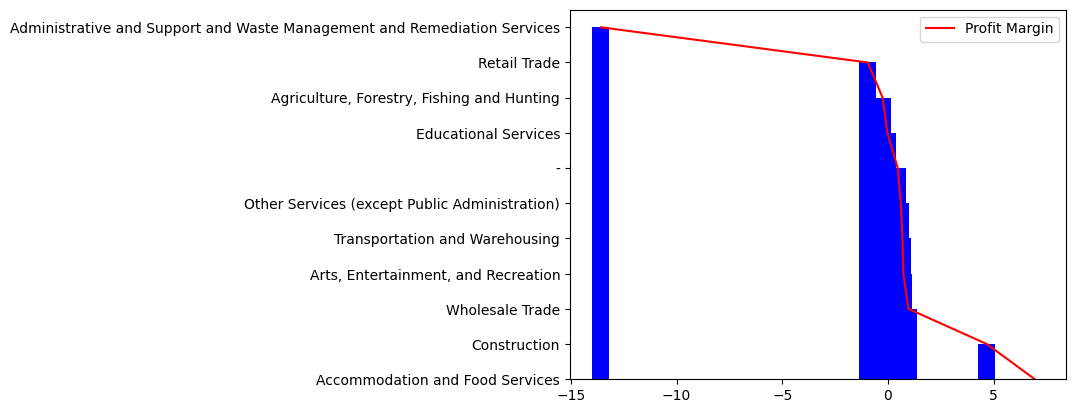

In [118]:
industries_profit_margin = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['operating_profit_margin'].agg('sum'))
industries_profit_margin = pd.DataFrame(industries_profit_margin['operating_profit_margin'].sort_values(ascending=False))
industries_profit_margin = industries_profit_margin.reset_index()

x = industries_profit_margin['Sector NAICS\nlevel 1']
y = industries_profit_margin['operating_profit_margin']

plt.plot(y,x, color="red")
plt.legend(['Profit Margin'])

plt.bar(y,x, color="blue")
plt.legend(['Profit Margin'])

industries_profit_margin

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

- Based on the comparison of the market value of each firm vs the mean of the market value of a US firm on the next dataframe we can see that half of this 10 firms are above the size, and the other half are under the typical size. 

In [46]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value

Typical size of firm: 72674032067.06265


,firm,market_value,more/less than typical size firm
0,BRK_A,2.439537e+14,2.438810e+14
1,INPX,5.247536e+11,4.520796e+11
2,TNXP,2.922010e+11,2.195269e+11
3,C,8.416117e+10,1.148713e+10
4,GEVO,7.845738e+10,5.783346e+09
5,CHK,6.383992e+10,-8.834108e+09
6,AIG,5.952997e+10,-1.314406e+10
7,MSFT,5.564783e+10,-1.702621e+10
8,NUWE,5.154638e+10,-2.112765e+10
9,JPM,4.553745e+10,-2.713659e+10


To make a more complete analysis and understand the why these numbers of these firms we could see to which industry they belong as in the following table:

- Here i don't know why it doesn't appear the first firm wich is BRK_A, but we can see that the industry that repeats the most is Finance and Insurance with 4 ocurrences, and the industry that follows is Manufacturing with 3 ocurrences. 

- With this information we can see that the industry that have more firms that are on the top 10 of market value is Finance and Insurance. 

- Also we can see that the industries that have less firms that are on the top 10 of market value are Finance and Insurance, Mining, Quarrying, and Oil and Gas Extraction and Information. 

Typical size of firm: 72674032067.06265


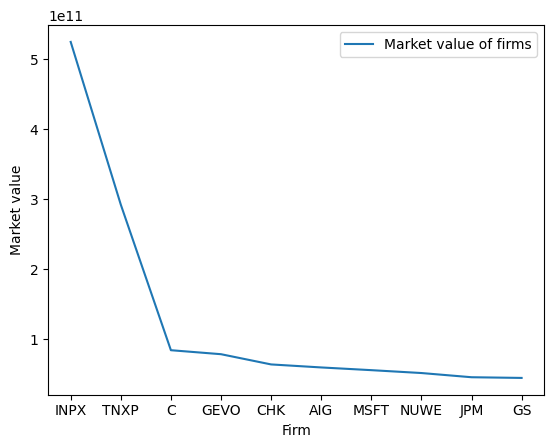

In [73]:
typical_size_of_USFirm = collapsed_dataframes["market_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
biggest_firms_market_value = pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_market_value['more/less than typical size firm'] = (biggest_firms_market_value['market_value'] - typical_size_of_USFirm )
biggest_firms_market_value
plt.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
plt.ylabel('Market value')
plt.xlabel('Firm')
plt.legend(['Market value of firms'])

Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

- Following the same process with the question above, we can see that all the firms are above the size of the typical firms of the US. 

In [74]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value

Typical size of firm: 3465162.6027016034


,firm,book_value,more/less than typical size firm
0,BRK_A,461229000.0,4.577638e+08
1,JPM,286143000.0,2.826778e+08
2,BAC,269118000.0,2.656528e+08
3,GOOGL,255419000.0,2.519538e+08
4,C,199626000.0,1.961608e+08
5,XOM,184508000.0,1.810428e+08
6,WFC,179793000.0,1.763278e+08
7,MSFT,166542000.0,1.630768e+08
8,CVX,154562000.0,1.510968e+08
9,T,135307000.0,1.318418e+08


With the information below, we can see that the industry that repeats the most is also Finance and Insurance with also 4 ocurrences.

The least repeated industry is "Professional, Scientific, and Technical Services" and "Retail Trade	" with 1 ocurrence each.

Typical size of firm: 3465162.6027016034


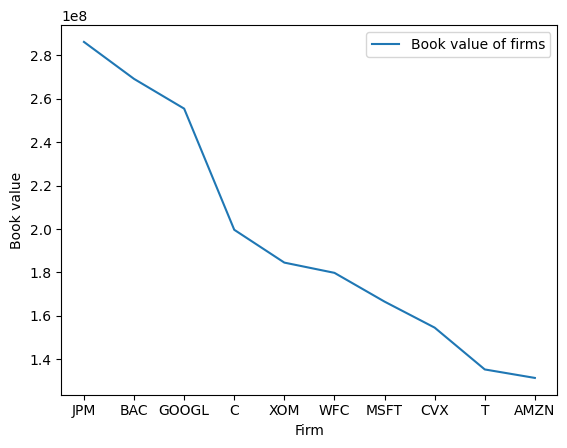

In [75]:
typical_size_of_USFirm = collapsed_dataframes["book_value"].mean()
print(f"Typical size of firm: {typical_size_of_USFirm}")
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm', 'Sector NAICS\nlevel 1'])['book_value'].agg('sum'))
biggest_firms_book_value = pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]
biggest_firms_book_value['more/less than typical size firm'] = (biggest_firms_book_value['book_value'] - typical_size_of_USFirm )
biggest_firms_book_value
plt.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])

plt.ylabel('Book value')
plt.xlabel('Firm')
plt.legend(['Book value of firms'])

To abstract this 2 plots, we plotted the market value and book value side by side getting the following plot.

- We can see that the book value is gradually declining, while the market value has a sudden drop with the 3rd firm and stays like that for the rest of firms.

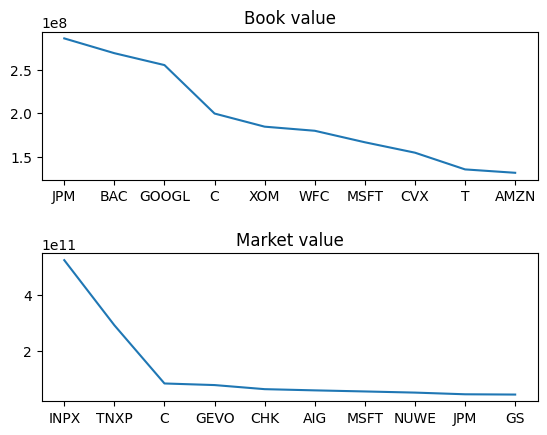

In [95]:


fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(biggest_firms_book_value['firm'], biggest_firms_book_value['book_value'])
ax1.set_title('Book value')
ax2.plot(biggest_firms_market_value['firm'], biggest_firms_market_value['market_value'])
ax2.set_title('Market value')
fig.subplots_adjust(hspace=.5)